### # 241,010,102       : 기저귀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/we/Downloads/업무/buy it again_분석 '

./chunk/

---

In [3]:
diaper_train = pd.read_excel('diaper_train.xlsx')
diaper_test = pd.read_excel('diaper_test.xlsx')

In [4]:
diaper_train.head(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
105,105,2018-01-01 00:00:26,"6,200,018","34,900","1,472,659","241,010,102",1
212,212,2018-01-01 00:00:52,"2,683,481","32,000","1,597,856","241,010,102",1
2357,2357,2018-01-01 00:03:47,"3,579,286","104,700","1,766,436","241,010,102",1


In [5]:
diaper_train.m_id.nunique()   # 약 20만명(31~32주 동안)

212550

In [6]:
train_mid = diaper_train.m_id.unique()

In [14]:
#구매유저가 21만명 있다!

train_mid.shape  

(212550,)

In [7]:
diaper_train[diaper_train.m_id == train_mid[0]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
105,105,2018-01-01 00:00:26,"6,200,018","34,900","1,472,659","241,010,102",1
3125,3125,2018-01-01 00:04:27,"6,200,018","34,900","1,472,659","241,010,102",1
732522,10732522,2018-01-24 09:44:17,"6,200,018","15,800","3,201,607","241,010,102",1


-----

### #  time interval 불러오기

In [8]:
tt = pd.read_csv('diaper_t_poi.csv')

In [9]:
tt.head()

,Unnamed: 0,0
0,0,3
1,1,7
2,2,2
3,3,1
4,4,3


In [10]:
tt = tt.iloc[:,1:]

In [11]:
# 데이터 확인

tt.tail(10)   # 음 ... 꼬리에는 구매 데이터가 없으니깐 그런가봐

,0
212540,1
212541,1
212542,1
212543,1
212544,1
212545,1
212546,1
212547,1
212548,1
212549,1


In [15]:
tt.shape   # #구매유저가 21만명 있다!(이들의 데이터!)

(212550, 1)

In [17]:
# train 데이터 확인

diaper_train.shape

(545775, 7)

In [18]:
# unique한 멤버 몇 명?

diaper_train.m_id.unique().shape

(212550,)

- 확인!

In [19]:
diaper_train.m_id.nunique()

212550

---

# # t (interval) 분석해보자

In [ ]:
# cc(바로 밑에줄의 tt를 말하는거야!) 의 의미 : 30주 동안의 거래 횟수

cc = []
train_mid = diaper_train.m_id.unique()

for i in range(len(train_mid)):
    cc.append(diaper_train[diaper_train.m_id == train_mid[i]].shape[0])
        

In [1]:
tt.shape

NameError: name 'tt' is not defined

In [21]:
tt = tt.dropna()  # t값 순수하게 얻은거야

In [22]:
# nan값 제거하고 얻은 shape

tt.shape

(212550, 1)

In [23]:
tt.head()

,0
0,3
1,7
2,2
3,1
4,3


In [24]:
# time 으로 column명 변경
tt.columns = ['purchase']

In [25]:
tt.head(5)

,purchase
0,3
1,7
2,2
3,1
4,3


In [26]:
#음.. 여기도 0인값이 많구나? - 무려 5만개야

tt.purchase.value_counts()

1       101142
2        41790
3        23030
4        14723
5         9862
6         6977
7         4753
8         3279
9         2188
10        1557
11         972
12         699
13         481
14         307
15         239
16         144
17         101
18          61
19          57
20          45
21          26
22          24
23          16
25          10
24           8
26           7
36           7
34           3
31           3
27           2
         ...  
33           2
147          1
132          1
272          1
379          1
28           1
187          1
83           1
82           1
79           1
76           1
74           1
72           1
71           1
70           1
66           1
64           1
185          1
1130         1
57           1
56           1
49           1
47           1
42           1
41           1
39           1
38           1
288          1
30           1
29           1
Name: purchase, Length: 63, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113087a58>]],
      dtype=object)

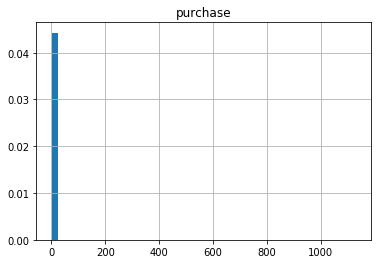

In [28]:
# time=0 인 값이 너무 많아보여서, histogram으로 다시 한번.

pd.DataFrame(tt).hist(bins = 50, density = True)

histogram : 와... 1이 너무많아!

In [61]:
tmean = tt.mean()

In [62]:
# 0을 포함했을때의 평균.. 어느정도 될까?

tmean

purchase    2.567749
dtype: float64

---

# 한번이라도 구매한 사람들 fitting : 30주 -> 1주

In [63]:
tt30 = tt/30

In [64]:
tt30

,purchase
0,0.100000
1,0.233333
2,0.066667
3,0.033333
4,0.100000
5,0.066667
6,0.100000
7,0.033333
8,0.100000
9,0.033333


In [65]:
tt30.mean()  # 30주 동안, 1주당 평균 구매발생건수는 0.08이다..?

purchase    0.085592
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112ae9c50>]],
      dtype=object)

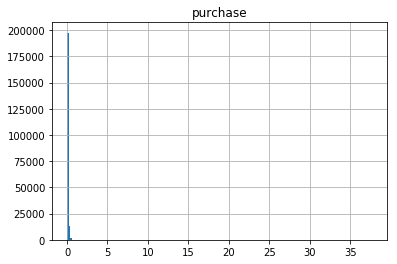

In [42]:
tt30.hist(bins=200)

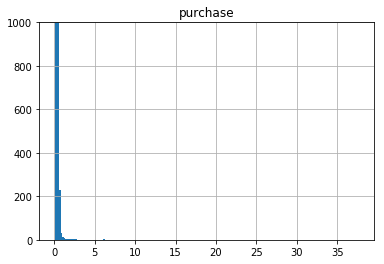

In [41]:
tt30.hist(bins=200)
plt.ylim(0,1000)

plt.show()
plt.close()

### # (1) gamma.fit으로 parameters 추정해볼게.

In [36]:
stats.gamma.fit(tt30)

(0.000308828799127924, 0.033333333333333326, 0.5761578873813951)

---

# # drop 1 value : 한번만 구매한사람들 drop?

#### 0인것을 드랍하는 작업! (column이 많을때는 이렇게 하자)

tt_drop0 = tt[(tt[['time']] != 1).all(axis=1)]

In [28]:
# 무슨 원리일까?

tt[['time']] != 0

,time
1,False
2,True
4,True
5,False
6,True
7,True
8,True
9,True
11,True
14,True


In [41]:
(tt[['time']] != 0).all(axis=1)

1         False
2          True
4          True
5         False
6          True
7          True
8          True
9          True
11         True
14         True
15         True
17         True
19         True
20         True
23        False
24         True
27         True
28         True
29         True
31         True
32         True
33         True
34         True
36         True
38         True
39         True
40         True
41         True
44        False
46         True
          ...  
545488    False
545503    False
545504    False
545505    False
545517    False
545523    False
545529    False
545532    False
545540    False
545548    False
545557    False
545558    False
545565    False
545566    False
545567    False
545584    False
545595    False
545613    False
545639    False
545640    False
545655    False
545673    False
545677    False
545678    False
545687    False
545688    False
545712    False
545718    False
545724    False
545749    False
Length: 333225, dtype: b

In [42]:
tt.time != 0

1         False
2          True
4          True
5         False
6          True
7          True
8          True
9          True
11         True
14         True
15         True
17         True
19         True
20         True
23        False
24         True
27         True
28         True
29         True
31         True
32         True
33         True
34         True
36         True
38         True
39         True
40         True
41         True
44        False
46         True
          ...  
545488    False
545503    False
545504    False
545505    False
545517    False
545523    False
545529    False
545532    False
545540    False
545548    False
545557    False
545558    False
545565    False
545566    False
545567    False
545584    False
545595    False
545613    False
545639    False
545640    False
545655    False
545673    False
545677    False
545678    False
545687    False
545688    False
545712    False
545718    False
545724    False
545749    False
Name: time, Length: 3332

In [44]:
# tt[['time']] 은 데이터프레임 - 열이 하나일때는 이렇게 해도 되나봐

tt_drop1 = tt[tt.purchase != 1] 

In [45]:
tt_drop1.shape

(111408, 1)

---

In [46]:
tt_drop1.head()

,purchase
0,3
1,7
2,2
4,3
5,2


In [47]:
tt_drop1.purchase.value_counts()

2       41790
3       23030
4       14723
5        9862
6        6977
7        4753
8        3279
9        2188
10       1557
11        972
12        699
13        481
14        307
15        239
16        144
17        101
18         61
19         57
20         45
21         26
22         24
23         16
25         10
24          8
36          7
26          7
34          3
31          3
27          2
45          2
        ...  
58          2
76          1
379         1
74          1
71          1
70          1
132         1
66          1
72          1
147         1
79          1
272         1
185         1
57          1
56          1
49          1
47          1
1130        1
42          1
41          1
39          1
38          1
288         1
30          1
29          1
28          1
187         1
83          1
82          1
64          1
Name: purchase, Length: 62, dtype: int64

(0, 0.02)

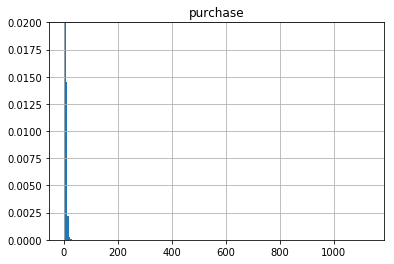

In [49]:
tt_drop1.hist(bins=210, density = True)
plt.ylim(0,0.02)
plt.xlim

# 2. 파라미터 추정

In [50]:
tt30 = tt_drop1/30

In [51]:
tt30

,purchase
0,0.100000
1,0.233333
2,0.066667
4,0.100000
5,0.066667
6,0.100000
8,0.100000
10,0.133333
11,0.166667
12,0.066667


In [54]:
tt30.purchase.value_counts()

0.066667     41790
0.100000     23030
0.133333     14723
0.166667      9862
0.200000      6977
0.233333      4753
0.266667      3279
0.300000      2188
0.333333      1557
0.366667       972
0.400000       699
0.433333       481
0.466667       307
0.500000       239
0.533333       144
0.566667       101
0.600000        61
0.633333        57
0.666667        45
0.700000        26
0.733333        24
0.766667        16
0.833333        10
0.800000         8
0.866667         7
1.200000         7
1.033333         3
1.133333         3
1.100000         2
1.933333         2
             ...  
1.066667         2
1.900000         1
2.200000         1
2.466667         1
1.266667         1
4.900000         1
37.666667        1
9.600000         1
2.133333         1
0.933333         1
2.733333         1
1.300000         1
4.400000         1
0.966667         1
6.166667         1
2.333333         1
9.066667         1
1.400000         1
2.766667         1
1.566667         1
2.400000         1
12.633333   

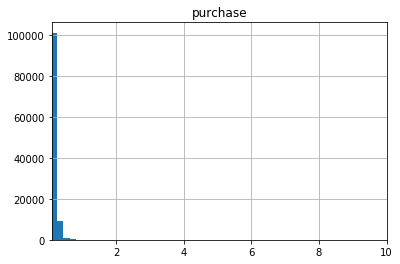

In [60]:
tt30.hist(bins=200)
plt.xlim(0.1,10)
#plt.ylim(0,1000)

plt.show()
plt.close()

### # (1) gamma.fit으로 parameters 추정해볼게.

In [36]:
stats.gamma.fit(tt30)

(0.000308828799127924, 0.033333333333333326, 0.5761578873813951)

In [31]:
stats.gamma.fit(tt_drop0, floc=0)  # floc=0 선언해주면, loc parmater 0으로 나오네

(1.4696308007488543, 0, 24.294860687371564)

In [32]:
alpha, _ , scale = stats.gamma.fit(tt_drop0, floc=0)

In [33]:
alpha, _ , scale

(1.4696308007488543, 0, 24.294860687371564)

- <U>(비교) r에서 MASS 패키지로 얻은 값들 : (1.469631198, , ,24.294852175) </U>  -> 그냥 python scipy써도 될 것 같아.

In [283]:
1.4696308007488543*24.294860687371564

35.704475566063735

---